# SIG0 Product

<div>
    <img style='width: 220px;height: 100px;float: left;' src="../../Supplementary_data/EODC-Logo-Final.png" height='100px' width='220px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/BMNT_DE_Logo_dreizeilig_srgb.svg" height='100px' width='200px'/> 
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/bmlv.svg" height='100px' width='200px'/>
    <img style='width: 200px;height: 100px;float: left;' src="../../Supplementary_data/LOGO_TUW_GEO.png" height='100px' width='200px'/>
    <img style='width: 100px;height: 100px;float: left;' src="../../Supplementary_data/Boku-wien.svg" height='100px' width='100px'/>
    <img style='width: 150px;height: 100px;float: right;' src="../../Supplementary_data/ADC_Logo_final_transparent.png" height='100px' width='150px'/>
</div>

This notebook shows the SIG0 product created by TU Wien. Sigma nought (SIG0) contains the backscatter data returned to the satellites antenna from a unit area on ground, calibrated, georeferenced, geolocation corrected, thermal and border-noise removed.

The product name in the ACube is `SIG0_Sentinel_1`. It is composed of two measurements `VV` and `VH`.

Relevant links:
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.4.%20data%20processing%20levels/3.4.3.%20Sentinel-1%20products/
* https://austriandatacube.eodc.eu/xwiki/bin/view/2.%20Terminology/3.3.%20Datasets/3.4.1.%20Sentinel-1%20data/3.4.1.3.%20Products/3.4.1.3.1.%20Sigma%20Nought/

## Exploring the product

The code below initialises the datacube and lists some metadata of the product, measurements and datasets. We can see that this product has two measurements and a spatial resolution of 10 m. We also list the metadata fields that are available.

In [1]:
import datacube
from pprint import pprint
%matplotlib inline
dc = datacube.Datacube(app='sample_sig0')
product = 'SIG0_Sentinel_1'

In [2]:
prodlist=dc.list_products().dropna(axis=1)
prodlist[prodlist['name'] == product]

,name,description,platform,instrument,product_type,format,crs,resolution,spatial_dimensions
id,,,,,,,,,
21,SIG0_Sentinel_1,Backscatter returned to the satellites antenna...,Sentinel-1,SAR,TUW_SIG0_S1,GeoTIFF,"PROJCS[""Azimuthal_Equidistant"",GEOGCS[""GCS_WGS...","[-10, 10]","(y, x)"


In [3]:
measlist = dc.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == product]

aliases  dtype  \
product         measurement                                                 
SIG0_Sentinel_1 VV           [band_1, band_01, B01, Band1, Band_1]  int16   
                VH           [band_2, band_02, B02, Band2, Band_2]  int16   

                            name  nodata units  
product         measurement                     
SIG0_Sentinel_1 VV            VV   -9999    dB  
                VH            VH   -9999    dB

In [4]:
query = {
    'lat': (48.15, 48.35),
    'lon': (16.3, 16.5),
    'time': ('2019-05-01', '2019-05-02')
}

In [5]:
for dataset in dc.find_datasets_lazy(product=product, **query):
    print(100*'*')
    print('METADATA FIELDS: ', sorted(list(dataset.metadata_doc.keys())))
    print(100*'*')
    print('METADATA')
    pprint(dataset.metadata_doc)
    print(100*'*')

****************************************************************************************************
METADATA FIELDS:  ['creation_dt', 'csw_link', 'extent', 'format', 'granule_id', 'grid_spatial', 'id', 'image', 'instrument', 'lineage', 'name', 'orbit', 'platform', 'product_format', 'product_type']
****************************************************************************************************
METADATA
{'creation_dt': '2019-10-30T07:03:59.312305',
 'csw_link': 'https://csw-acube.eodc.eu//?service=CSW&version=3.0.0&request=GetRecordById&id=SIG0-----_SGRTA01_S1A_IWGRDH1VVD_20190502_050954--_EU010M_E052N016T1&elementSetName=full&outputSchema=http://www.isotc211.org/2005/gmd&outputformat=application/xml',
 'extent': {'center_dt': '2019-05-02T05:10:06.500000',
            'coord': {'ll': {'lat': 47.97836637131795,
                             'lon': 15.455732336236059},
                      'lr': {'lat': 48.07479777972179,
                             'lon': 16.787238513505876},
      

## Querying and displaying the data

In [6]:
data = dc.load(product=product, 
               output_crs='EPSG:32633', 
               resolution=(-10,10),
                **query)
data

<xarray.Dataset>
Dimensions:  (time: 1, x: 1526, y: 2250)
Coordinates:
  * time     (time) datetime64[ns] 2019-05-02T05:10:06.500000
  * y        (y) float64 5.356e+06 5.356e+06 5.356e+06 ... 5.334e+06 5.334e+06
  * x        (x) float64 5.963e+05 5.963e+05 5.963e+05 ... 6.116e+05 6.116e+05
Data variables:
    VV       (time, y, x) int16 -738 -793 -466 -589 -885 ... -188 -85 -76 -78
    VH       (time, y, x) int16 -1323 -1325 -1389 -1470 ... -1176 -1167 -1032
Attributes:
    crs:      EPSG:32633

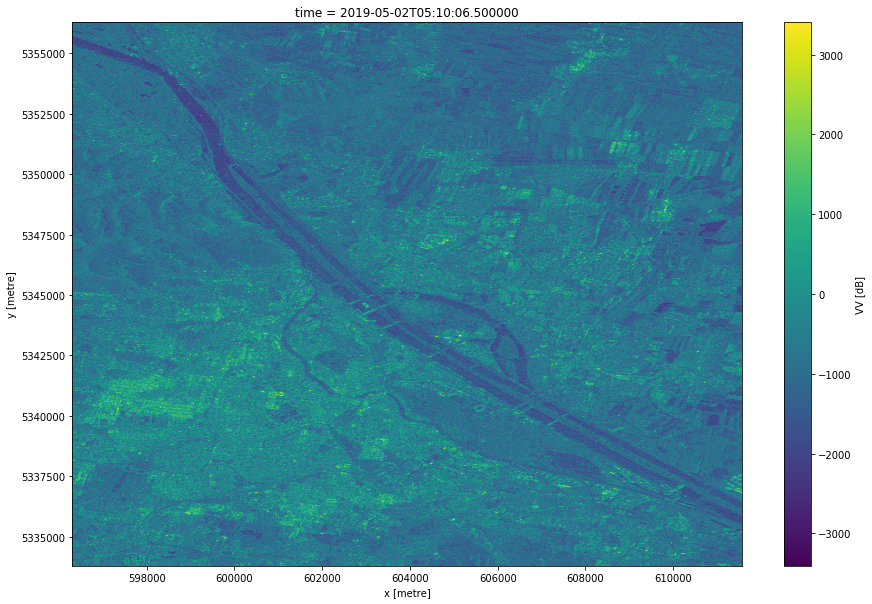

In [7]:
data.VV.plot(size=10, cmap='viridis')

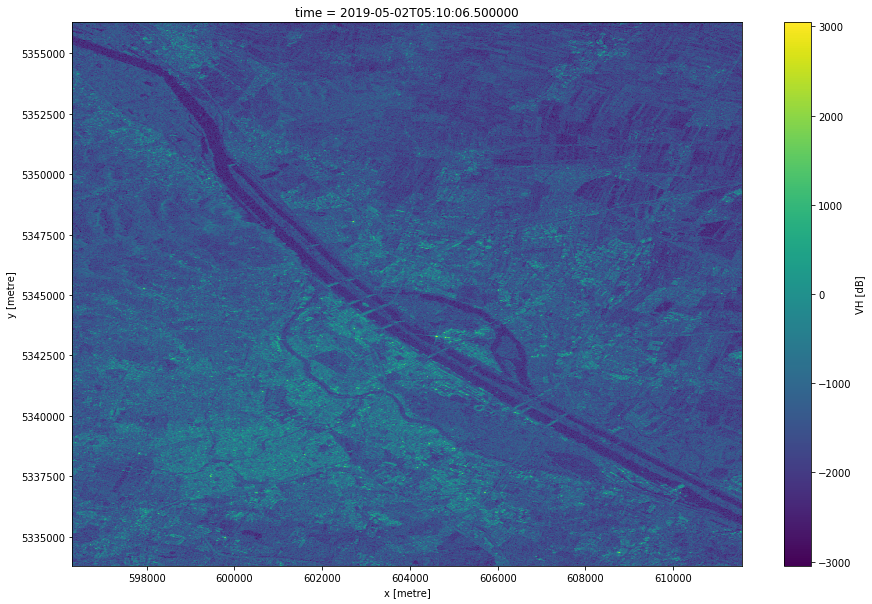

In [8]:
data.VH.plot(size=10, cmap='viridis')